# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Cahyo Purnomo
- **Email:** cahjoe21@gmail.com
- **ID Dicoding:** cahyo_purnomo

## Menentukan Pertanyaan Bisnis

- Bagaimana trend polusi udara di kota Changping?
- Bagaimana trend perubahan suhu di Changping?
- Bagaimana pengaruh tingkat polusi udara dengan perubahan suhu di Changping?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Proses gathering data ini dengan mengubah data csv menjadi dataframe menggunakan library pandas.

In [3]:
df_changping = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
df_changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Assessing Data

Proses pertama dalam cleaning data adalah memeriksa jumlah dan tipe data pada df_changping.

In [4]:
df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Jumlah dari df_changping terlihat tidak sama itu menandakan bahwa ada data yang kosong, untuk tipe datanya sendiri sudah sesuai dan tidak ada keanehan. Selanjutnya cek berapa data yang kosong tiap kolom.

In [5]:
df_changping.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Ada lumayan banyak data yang kosong pada kolom parameter pengukuran kualitas udara sehingga pada cleaning data perlu di cek kembali apakah mau di drop atau diisi dengan nilai tertentu. Selanjutnya cek apakah ada data duplikasi.

In [6]:
print("Jumlah duplikasi:", df_changping.duplicated().sum())

Jumlah duplikasi: 0


Tidak ada dupikasi dari data df_changping. Selanjutnya cek karakteristik datanya menggunakan parameter statistik.

In [7]:
df_changping.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


Dari parameter statistik df_changping kolom waktu dari "year" sampai "hour" tidak ada inacurate value. Sedangkan untuk kolom parameter polusi udara saya anggap sudah sesuai karena untuk memastikan kualitas datanya perlu menanyakan langsung atau kalibrasi ulang alat pengamatannya.

### Cleaning Data

Proses pertama dalam cleaning data adalah memilah data yang ingin dipakai, dalam hal ini saya hanya akan memakai data dari kolom year sampai TEMP atau suhu saja. Data sisanya saya akan hapus saja sehingga dapat lebih fokus.

In [8]:
df_changping = df_changping.drop(columns={'No', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'})
df_changping.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5


Proses selanjutnya mengubah kolom PM2.5 menjadi PM2_5 untuk mempermudah operasi pandas.

In [9]:
df_changping.rename(columns={"PM2.5": "PM2_5"}, inplace=True)
df_changping.head()

,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5


Proses selanjutnya adalah:
- Saya fokus pada data kolom PM_25 sampai PRESS saja, karena kolom tersebut saja yang terdapat data yang hilang.
- Saya cek apakah ada data hilang dari kolom PM_25 sampai TEMP dalam satu baris, kalau iya saya akan drop baris tersebut.
- Apabila tidak ada maka saya akan menggunakan metode lain yang cocok

In [10]:
fokus = df_changping.iloc[:, 5:13].isna().all(1)
print("jumlah data Nan dalam satu baris dari kolom PM2_5 sampai TEMP: ", fokus.sum()) 

jumlah data Nan dalam satu baris dari kolom PM2_5 sampai TEMP:  0


Karena data kosongnya acak per kolom maka saya menggunakan metode ffil yaitu memasukan nilai sebelumnya pada data yang kosong.

In [11]:
df_changping.fillna(method="ffill", inplace=True)
df_changping.isna().sum()

year     0
month    0
day      0
hour     0
PM2_5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Trend Kualitas Udara di Changping

Tren data kualitas udara harian dengan data perjam:
- Memilih kolom tentang parameter kualitas udara saja
- Mengurutkan data dari yang terlama

In [12]:
changping_polution_hour = df_changping.iloc[:, 0:10].sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
changping_polution_hour.head(24)

,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0
5,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0
6,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0
7,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0
8,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0
9,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0


Tren data kualitas udara Bulanan dengan data perhari:
- Membuat pivot tabel dengan rata-rata perhari dari data kualitas udara perjam

In [13]:
changping_polution_day = changping_polution_hour.groupby(by = ['year', 'month', 'day'] ).agg({
    "PM2_5" : "mean",
    "PM10" : "mean",
    "SO2" : "mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"})
changping_polution_day = changping_polution_day.reset_index()
changping_polution_day.head(31)

,year,month,day,PM2_5,PM10,SO2,NO2,CO,O3
0,2013,3,1,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667
1,2013,3,2,33.333333,39.833333,40.958333,60.000000,962.500000,28.833333
2,2013,3,3,57.541667,82.666667,37.875000,58.791667,1254.000000,31.333333
3,2013,3,4,20.791667,36.166667,22.375000,30.250000,583.333333,66.458333
4,2013,3,5,106.958333,125.166667,50.708333,75.291667,1641.333333,88.750000
5,2013,3,6,235.291667,257.458333,97.291667,119.750000,3137.083333,68.208333
6,2013,3,7,200.666667,223.958333,81.958333,129.250000,3257.916667,41.000000
7,2013,3,8,182.375000,239.708333,58.475200,90.501142,2541.333333,82.208333
8,2013,3,9,58.250000,200.208333,28.250000,32.375000,937.416667,102.250000
9,2013,3,10,30.250000,50.125000,20.750000,34.291667,604.166667,97.291667


Tren data kualitas udara tahunan dengan data perbulan:
- Membuat pivot tabel dengan rata-rata perbulan dari data kualitas udara perhari

In [14]:
changping_polution_month = changping_polution_day.groupby(by = ['year', 'month'] ).agg({
    "PM2_5" : "mean",
    "PM10" : "mean",
    "SO2" : "mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"})
changping_polution_month = changping_polution_month.reset_index()
changping_polution_month.iloc[10:22 , :]

,year,month,PM2_5,PM10,SO2,NO2,CO,O3
10,2014,1,88.302419,109.947581,57.864247,56.221774,2247.715054,26.029570
11,2014,2,143.485119,150.541667,63.032738,60.589286,2170.982143,26.040179
12,2014,3,86.000000,127.849462,34.607527,53.676075,1308.064516,44.032258
13,2014,4,105.648611,140.630556,15.275000,46.405556,853.055556,78.715278
14,2014,5,53.959140,100.342070,12.308737,36.375672,744.354839,95.679301
15,2014,6,45.038889,59.505556,5.329167,31.380556,689.722222,108.244444
16,2014,7,78.219086,101.248656,5.741935,32.405914,881.182796,118.873656
17,2014,8,56.558199,75.984543,4.777823,35.984140,746.908602,108.978629
18,2014,9,60.420139,78.710417,5.350000,35.149722,913.472222,65.370417
19,2014,10,118.533602,138.473118,6.551075,58.215054,1281.451613,30.763441


Tren data kualitas udara pertahun :
- Membuat pivot tabel dengan rata-rata pertahun dari data kualitas udara perbulan

In [15]:
changping_polution_year = changping_polution_month.groupby(by = ['year'] ).agg({
    "PM2_5" : "mean",
    "PM10" : "mean",
    "SO2" : "mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"})
changping_polution_year = changping_polution_year.reset_index()
changping_polution_year.head()

,year,PM2_5,PM10,SO2,NO2,CO,O3
0,2013,72.369547,91.138593,19.090626,40.881037,1034.354915,61.102386
1,2014,80.504052,107.667307,21.515365,45.942992,1232.540403,63.149193
2,2015,69.313914,93.663873,11.791633,43.007472,1167.425969,58.038021
3,2016,61.437443,86.395461,8.149998,45.503206,1126.828420,54.028104
4,2017,78.766609,93.073469,16.381720,50.716134,1519.882873,33.190452


### Explore Trend Suhu di Changping

Trend suhu harian dengan data perjam:
- Memilih data year, month, day, hour, dan temp dengan pivot table
- Mengurutkan dari data yang lama

In [16]:
changping_temp_hour = df_changping.groupby(by = ['year', 'month', 'day','hour'] ).agg({"TEMP" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
changping_temp_hour = changping_temp_hour.reset_index()
changping_temp_hour.head(24)

,year,month,day,hour,TEMP
0,2013,3,1,0,-2.3
1,2013,3,1,1,-2.5
2,2013,3,1,2,-3.0
3,2013,3,1,3,-3.6
4,2013,3,1,4,-3.5
5,2013,3,1,5,-4.5
6,2013,3,1,6,-4.5
7,2013,3,1,7,-2.1
8,2013,3,1,8,-0.2
9,2013,3,1,9,0.6


Trend suhu bulanan dengan data perhari:
- Memilih data year, month, day, hour, dan temp dengan pivot table dari data perjam

In [17]:
changping_temp_day = changping_temp_hour.groupby(by = ['year', 'month', 'day'] ).agg({"TEMP" : "mean"})
changping_temp_day = changping_temp_day.reset_index()
changping_temp_day.head(31)

,year,month,day,TEMP
0,2013,3,1,0.812500
1,2013,3,2,-0.395833
2,2013,3,3,5.329167
3,2013,3,4,9.237500
4,2013,3,5,6.462500
5,2013,3,6,7.345833
6,2013,3,7,9.237500
7,2013,3,8,12.037500
8,2013,3,9,7.112500
9,2013,3,10,7.291667


Trend suhu tahunan dengan data perbulan:
- Memilih data year, month, day, hour, dan temp dengan pivot table dari data perhari

In [18]:
changping_temp_month = changping_temp_day.groupby(by = ['year', 'month'] ).agg({"TEMP" : "mean"})
changping_temp_month = changping_temp_month.reset_index()
changping_temp_month.head(12)
changping_temp_month.tail(12)

,year,month,TEMP
36,2016,3,8.850134
37,2016,4,16.328056
38,2016,5,21.062903
39,2016,6,25.385694
40,2016,7,27.111290
41,2016,8,27.188441
42,2016,9,21.401727
43,2016,10,12.818898
44,2016,11,4.117361
45,2016,12,0.099866


Trend suhu pertahun:
- Memilih data year, month, day, hour, dan temp dengan pivot table dari data perbulan

In [19]:
changping_temp_year = changping_temp_month.groupby(by = ['year'] ).agg({"TEMP" : "mean"})
changping_temp_year = changping_temp_year.reset_index()
changping_temp_year.head()

,year,TEMP
0,2013,15.959306
1,2014,14.089640
2,2015,13.495245
3,2016,13.470883
4,2017,0.490600


### Korelasi antara polusi udara dan suhu di Changping

Menghitung korelasi antara semua parameter polusi udara dan suhu satu per satu:
- Menghitung korelasi PM2.5 dengan suhu
- Menghitung korelasi PM10 dengan suhu
- Menghitung korelasi SO2 dengan suhu
- Menghitung korelasi NO2 dengan suhu
- Menghitung korelasi CO dengan suhu
- Menghitung korelasi 03 dengan suhu

In [20]:
PM2_5_temp_pollution = round(df_changping['PM2_5'].corr(df_changping['TEMP']),7)
PM10_temp_pollution = round(df_changping['PM10'].corr(df_changping['TEMP']),7)
SO2_temp_pollution = round(df_changping['SO2'].corr(df_changping['TEMP']),7)
NO2_temp_pollution = round(df_changping['NO2'].corr(df_changping['TEMP']),7)
CO_temp_pollution = round(df_changping['CO'].corr(df_changping['TEMP']),7)
O3_temp_pollution = round(df_changping['O3'].corr(df_changping['TEMP']),7)
correlation_temp_pollution = {'parameter': ["PM2_5", "PM10", "SO2", "NO2", "CO", "O3"], 'values' : [PM2_5_temp_pollution, PM10_temp_pollution, SO2_temp_pollution, NO2_temp_pollution, CO_temp_pollution, O3_temp_pollution]}
df_temp_pollution_changping = pd.DataFrame(correlation_temp_pollution)
df_temp_pollution_changping.head(6)

,parameter,values
0,PM2_5,-0.112060
1,PM10,-0.092090
2,SO2,-0.352384
3,NO2,-0.359223
4,CO,-0.349704
5,O3,0.626312


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend polusi udara di kota Changping?

Fungsi grafik polusi udara

In [21]:
def grafik_polusi_udara(judul, x, df):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    ax[0,0].plot(x, df['PM2_5'], marker='o', linewidth=3)
    ax[0,0].tick_params(axis='y', labelsize=20)
    ax[0,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,0].set_ylabel("PM2_5", fontsize=25)
    ax[0,0].set_title("PM2_5", loc="center", fontsize=35)

    ax[0,1].plot(x, df['PM10'], marker='o', linewidth=3)
    ax[0,1].tick_params(axis='y', labelsize=20)
    ax[0,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,1].set_ylabel("PM10", fontsize=25)
    ax[0,1].set_title("PM10", loc="center", fontsize=35)

    ax[1,0].plot(x, df['SO2'], marker='o', linewidth=3)
    ax[1,0].tick_params(axis='y', labelsize=20)
    ax[1,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,0].set_ylabel("SO2", fontsize=25)
    ax[1,0].set_title("SO2", loc="center", fontsize=35)

    ax[1,1].plot(x, df['NO2'], marker='o', linewidth=3)
    ax[1,1].tick_params(axis='y', labelsize=20)
    ax[1,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,1].set_ylabel("NO2", fontsize=25)
    ax[1,1].set_title("NO2", loc="center", fontsize=35)


    ax[2,0].plot(x, df['CO'], marker='o', linewidth=3)
    ax[2,0].tick_params(axis='y', labelsize=20)
    ax[2,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,0].set_ylabel("CO", fontsize=25)
    ax[2,0].set_title("CO", loc="center", fontsize=35)


    ax[2,1].plot(x, df['O3'], marker='o', linewidth=3)
    ax[2,1].tick_params(axis='y', labelsize=20)
    ax[2,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,1].set_ylabel("O3", fontsize=25)
    ax[2,1].set_title("O3", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    for ax in ax.flat:
        ax.set_xticks(np.arange(x.min(),x.max()+1,step=1))


    plt.suptitle(judul, fontsize=45, y=1.05)
    plt.show()


Grafik polusi udara harian

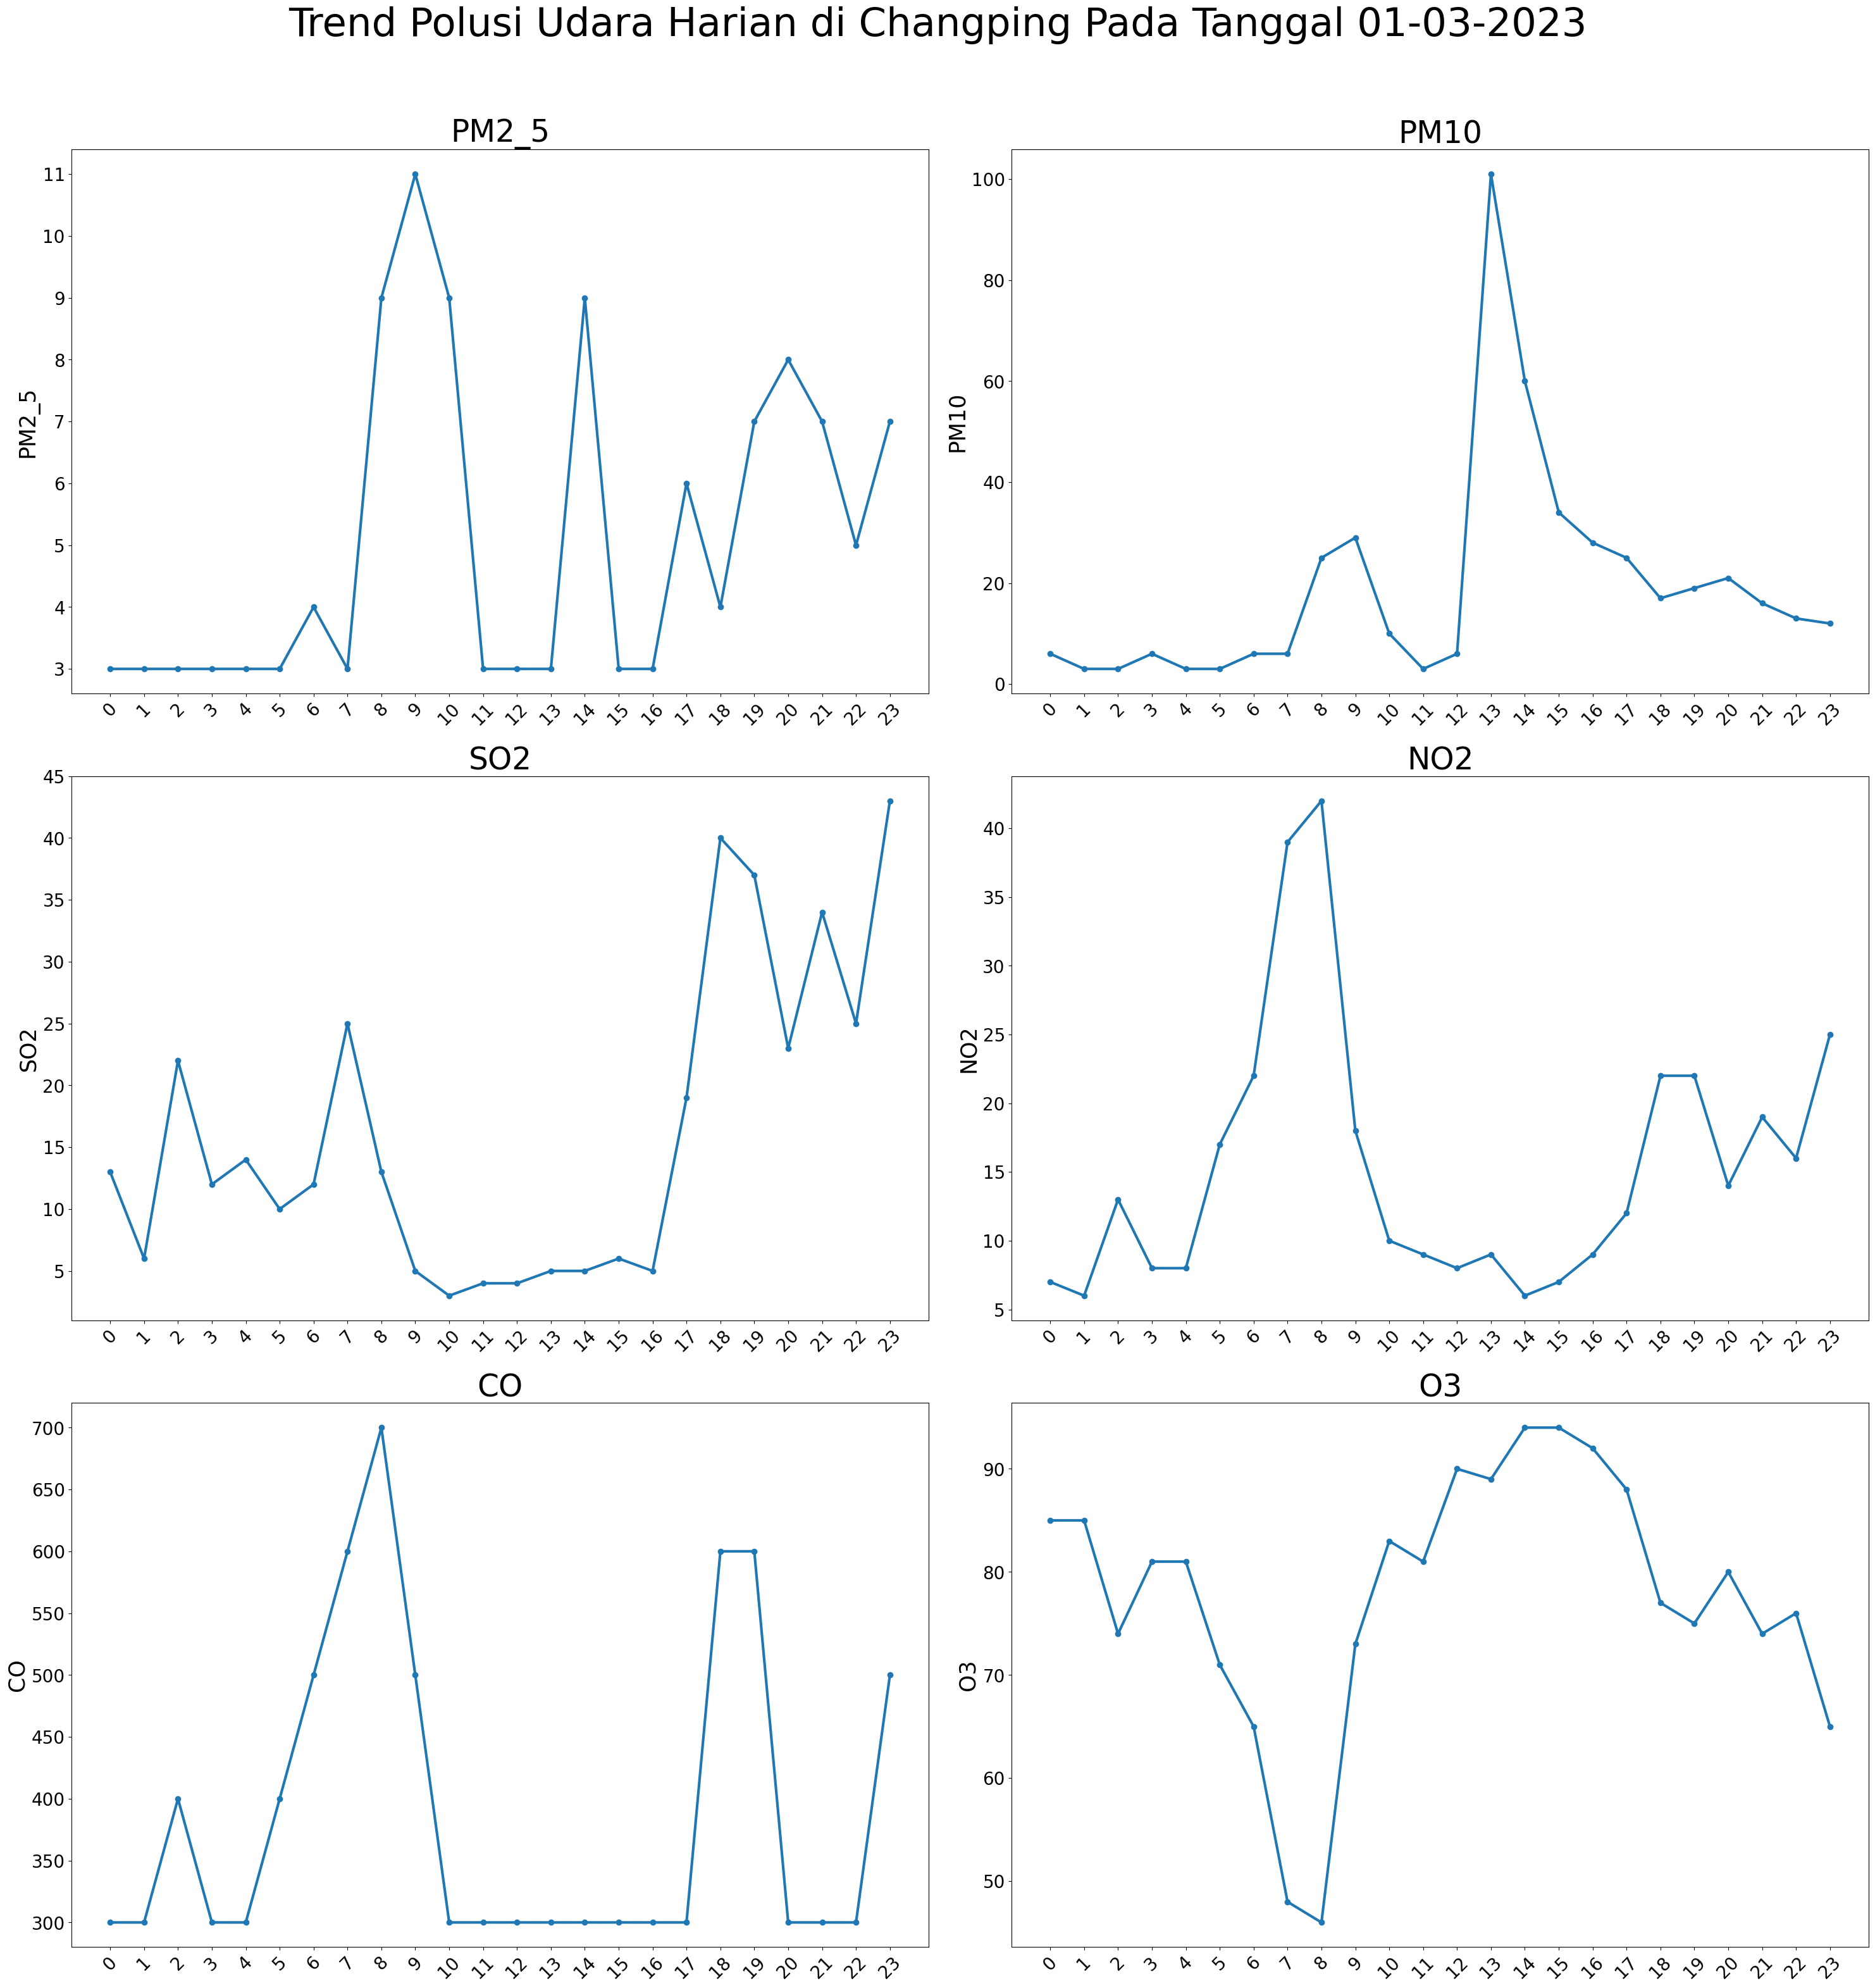

In [32]:
judul = "Trend Polusi Udara Harian di Changping Pada Tanggal 01-03-2023"
grafik_polusi_udara(judul, changping_polution_hour["hour"].head(24), changping_polution_hour.head(24))

Grafik polusi udara bulanan

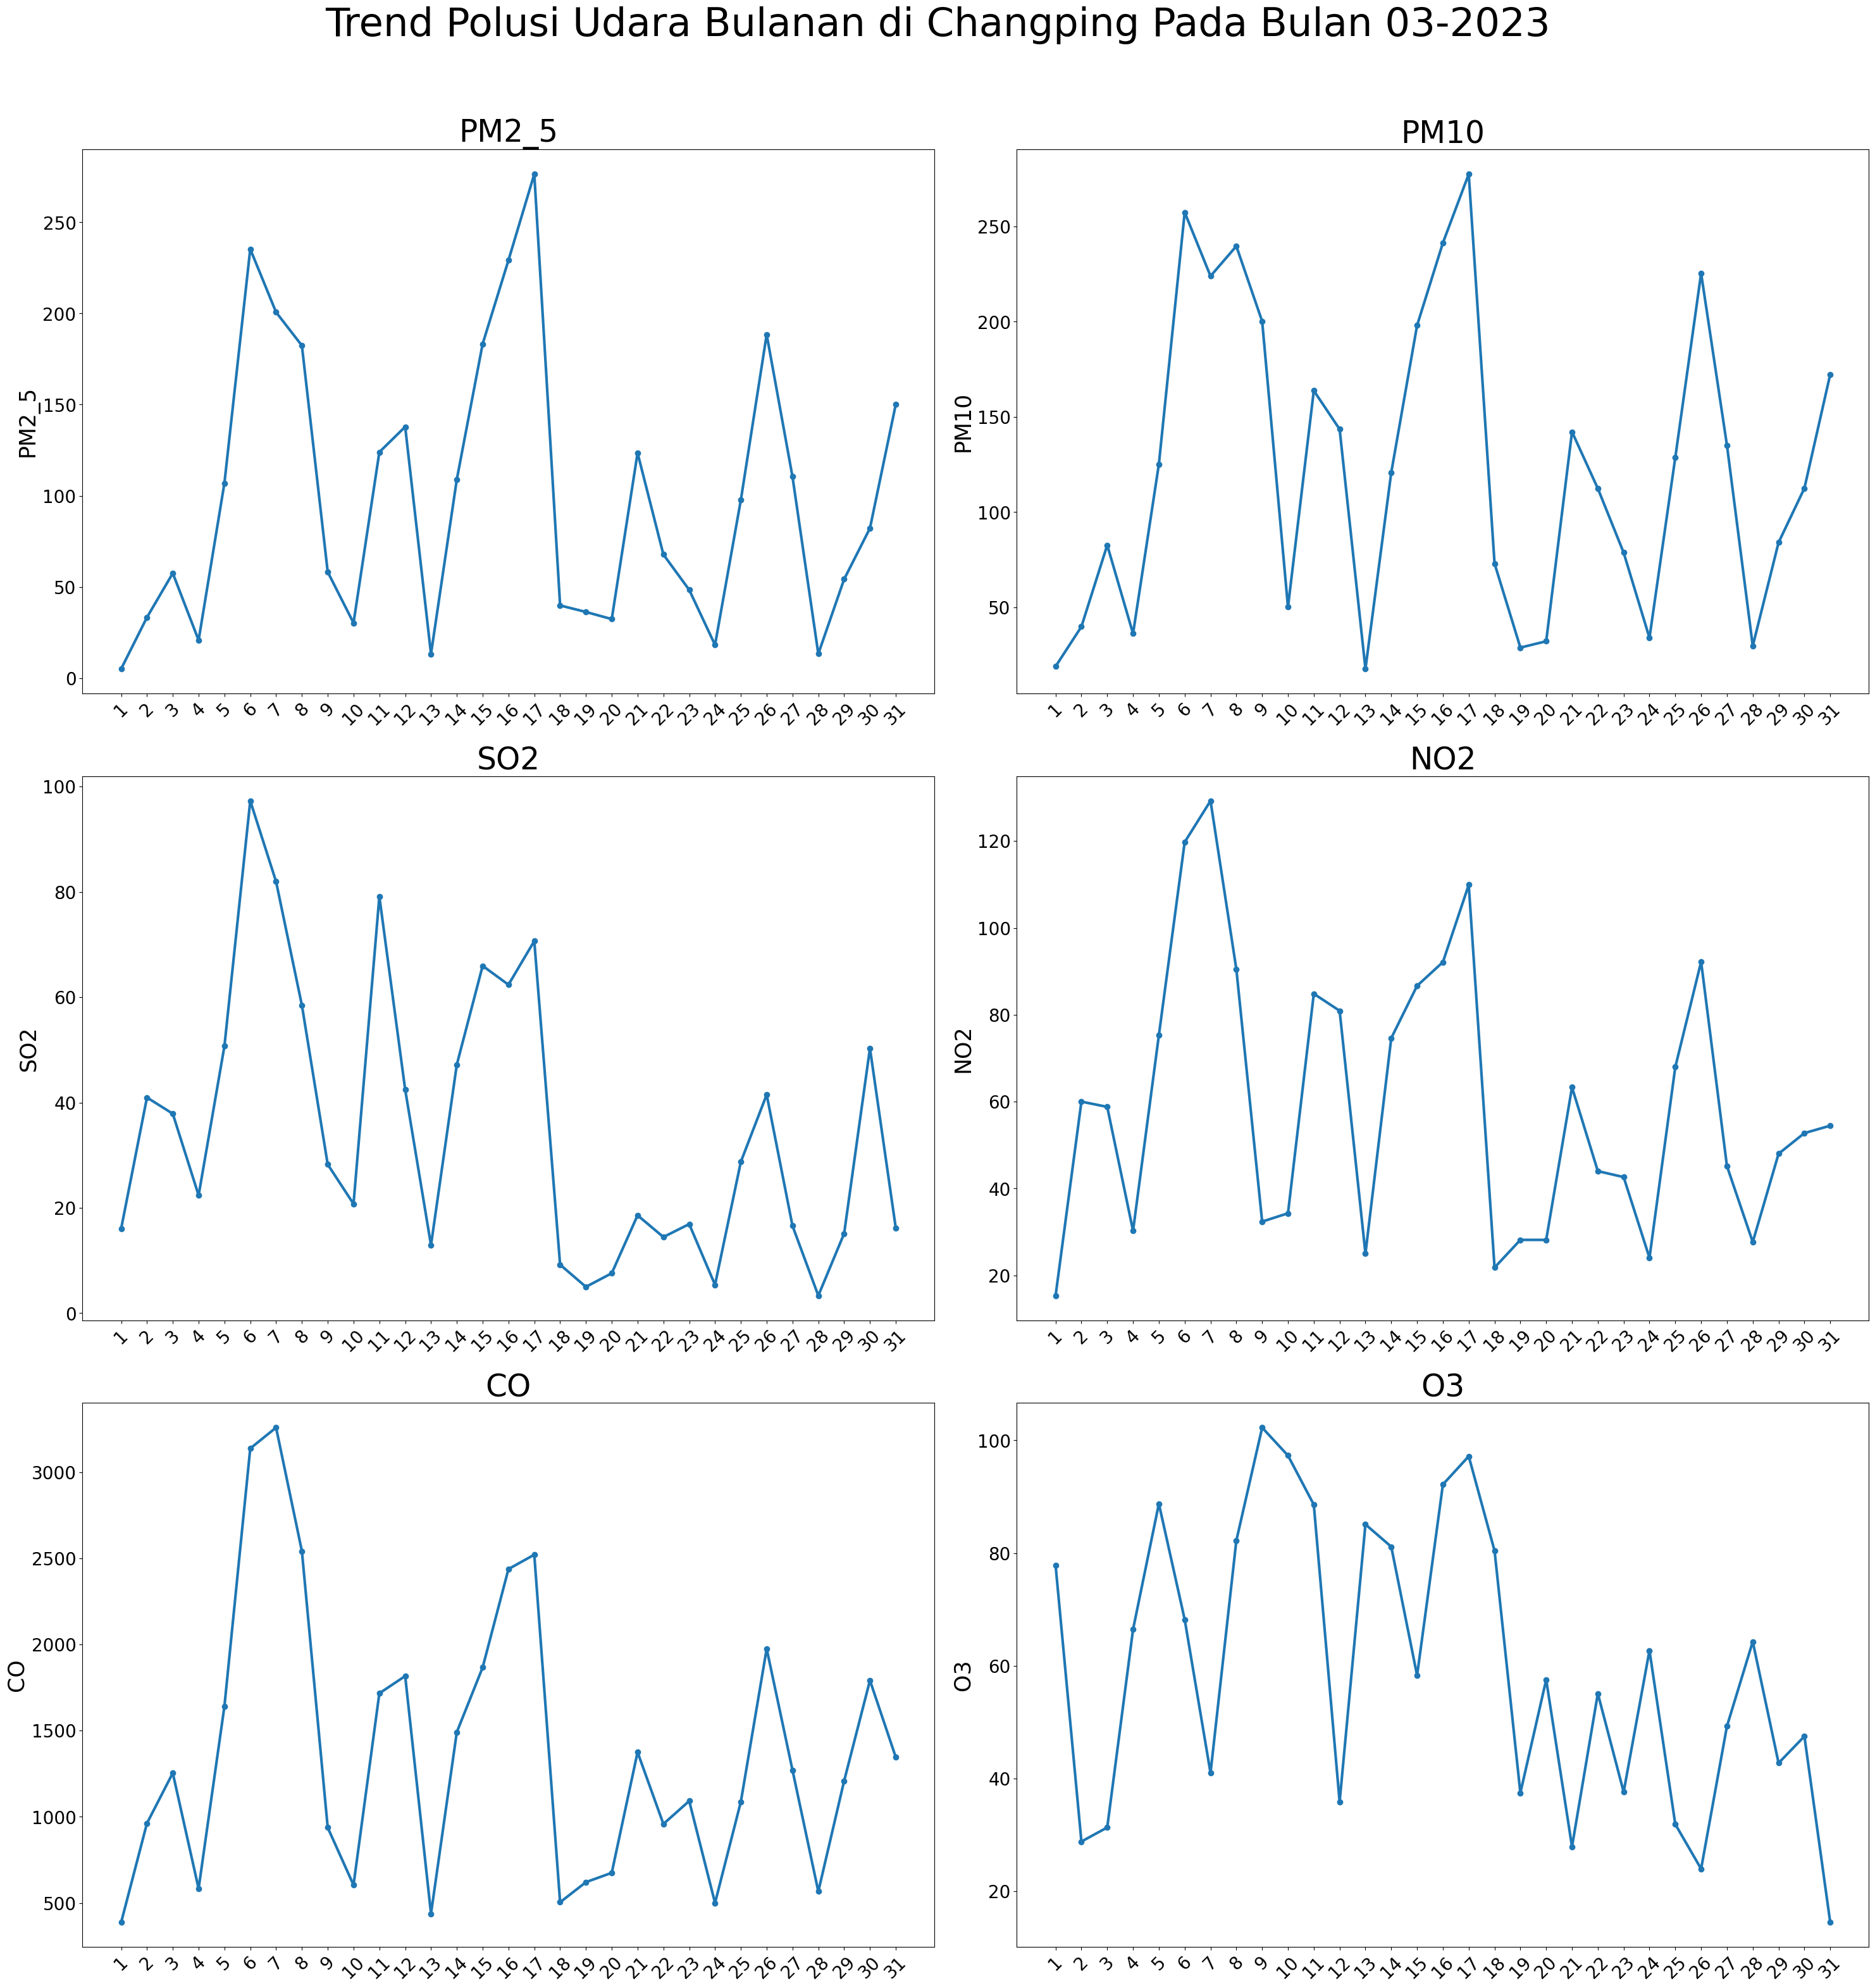

In [31]:
judul = "Trend Polusi Udara Bulanan di Changping Pada Bulan 03-2023"
grafik_polusi_udara(judul, changping_polution_day["day"].head(31), changping_polution_day.head(31))

Grafik polusi udara Tahunan

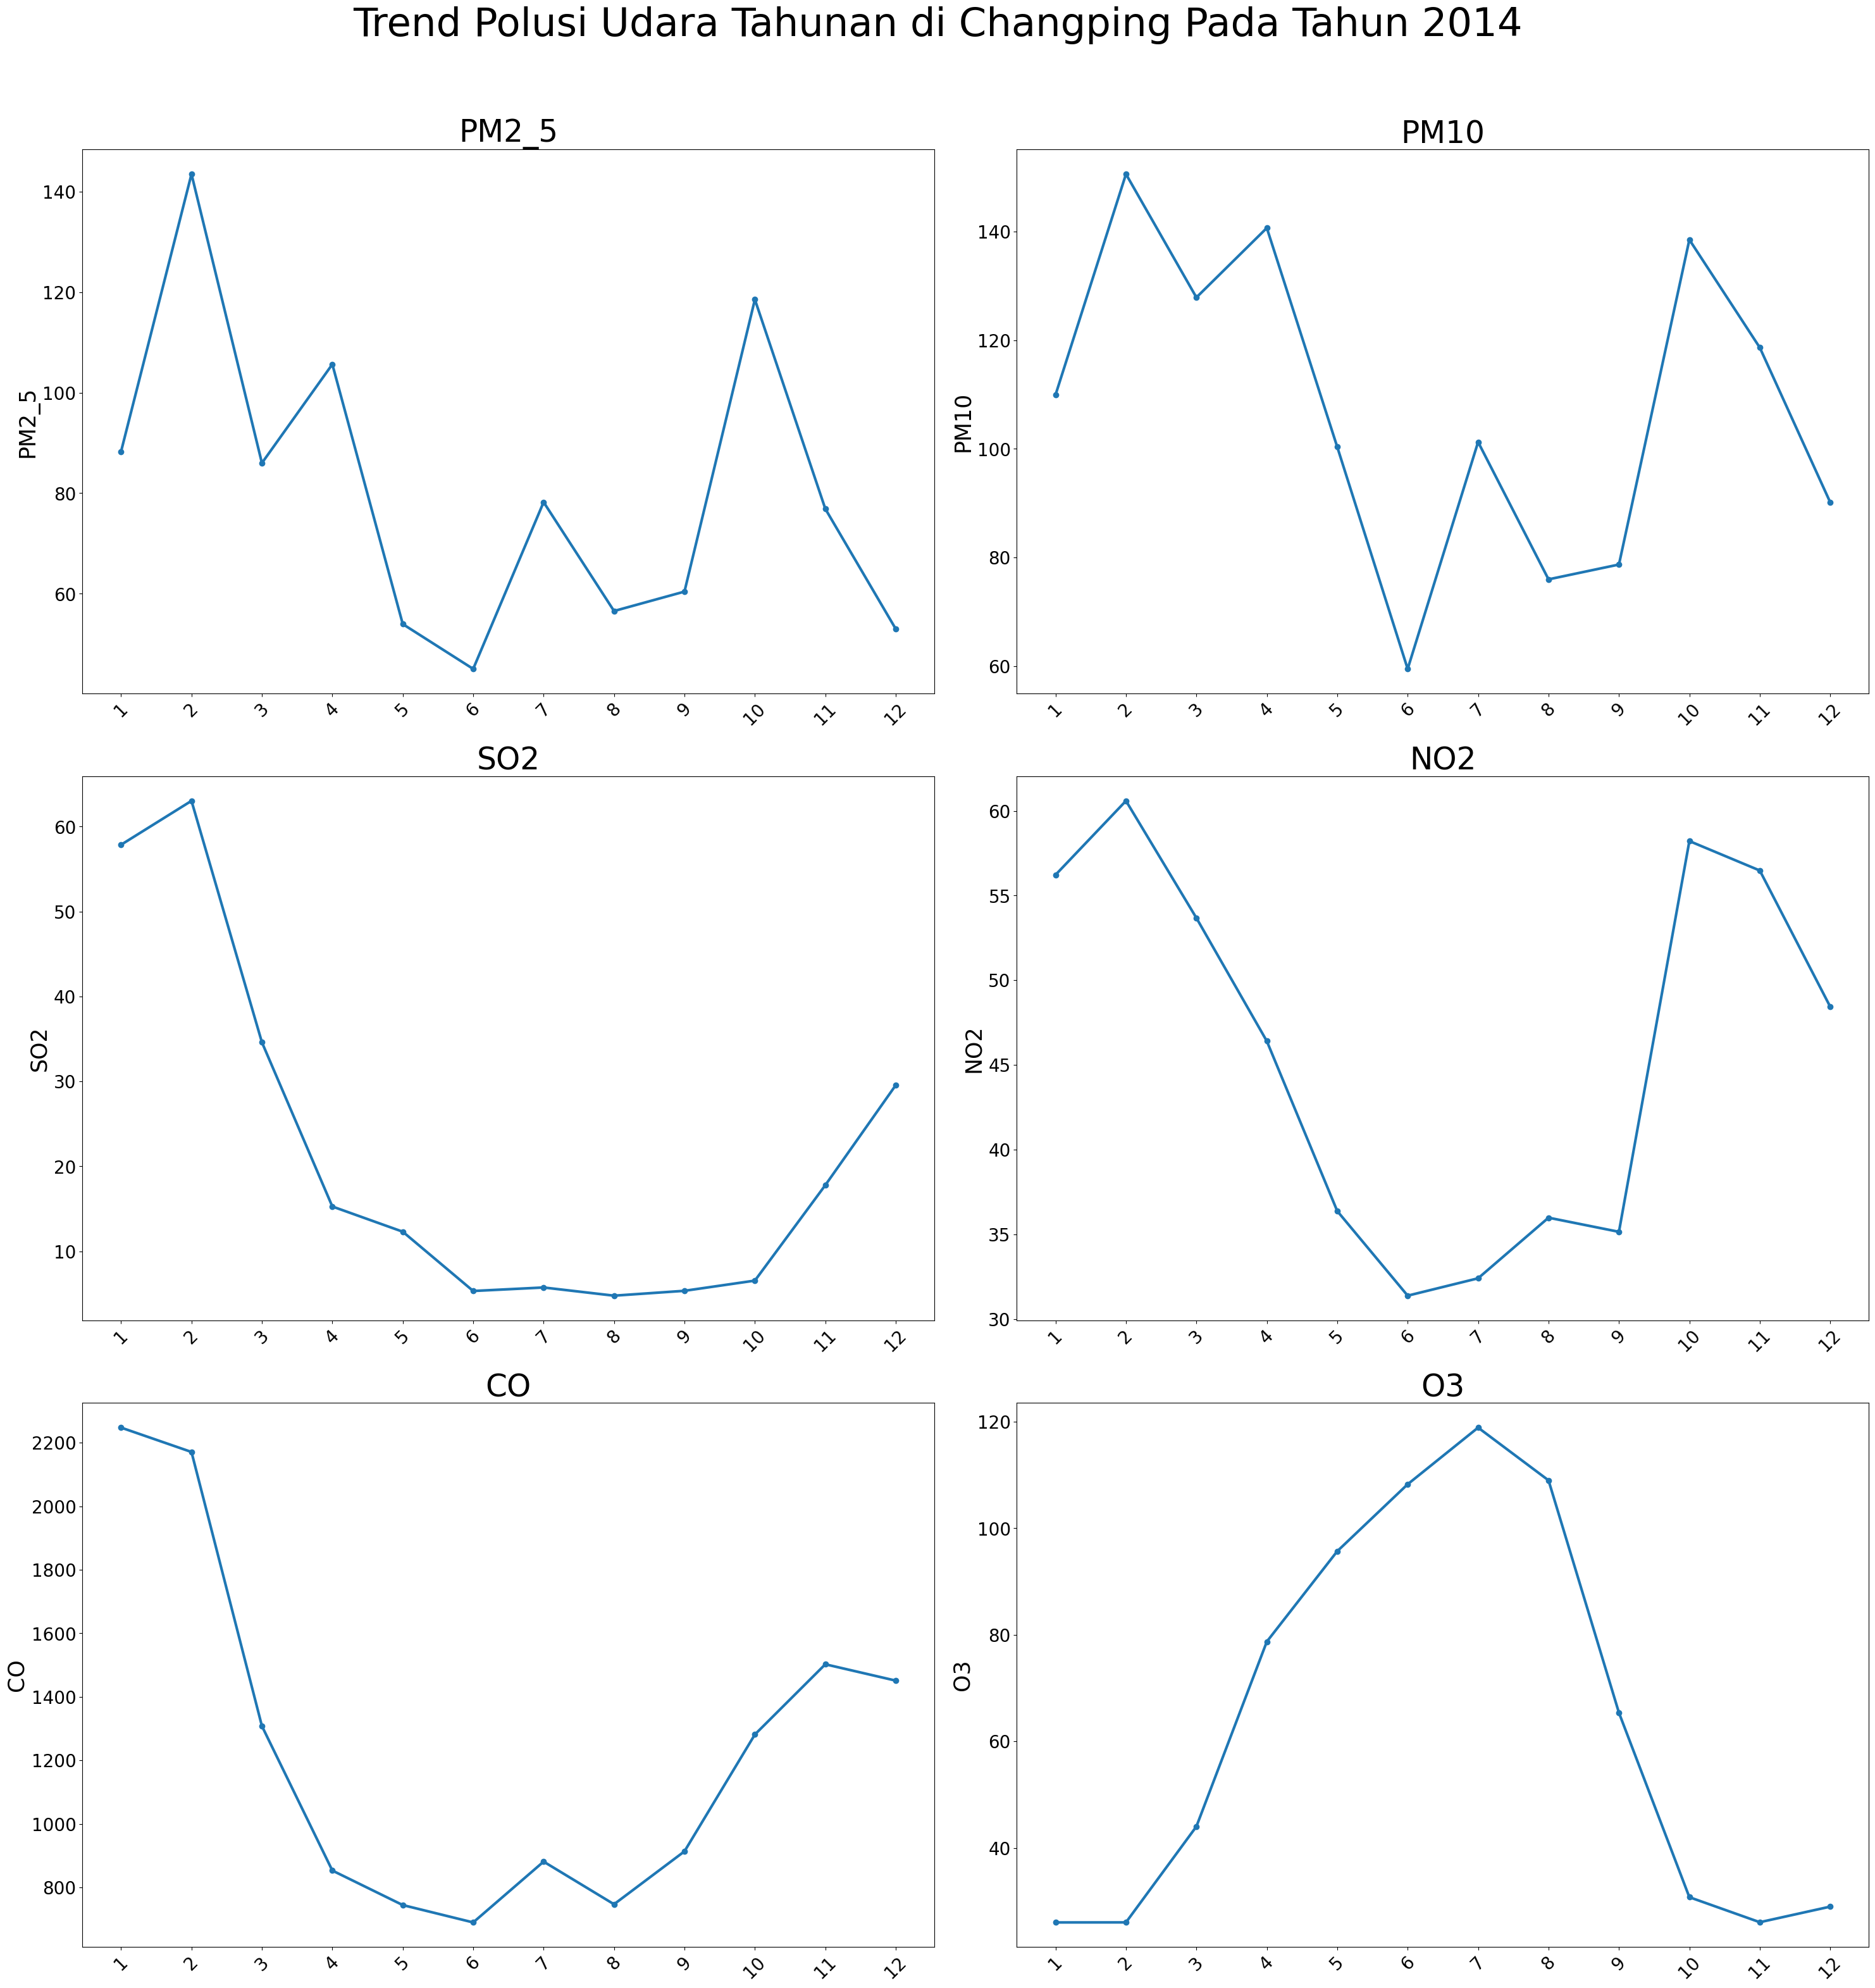

In [33]:
judul = "Trend Polusi Udara Tahunan di Changping Pada Tahun 2014"
sample_tahunan = changping_polution_month.iloc[10:22, :]
grafik_polusi_udara(judul, sample_tahunan["month"], sample_tahunan)

### Pertanyaan 2: Bagaimana trend perubahan suhu di Changping?

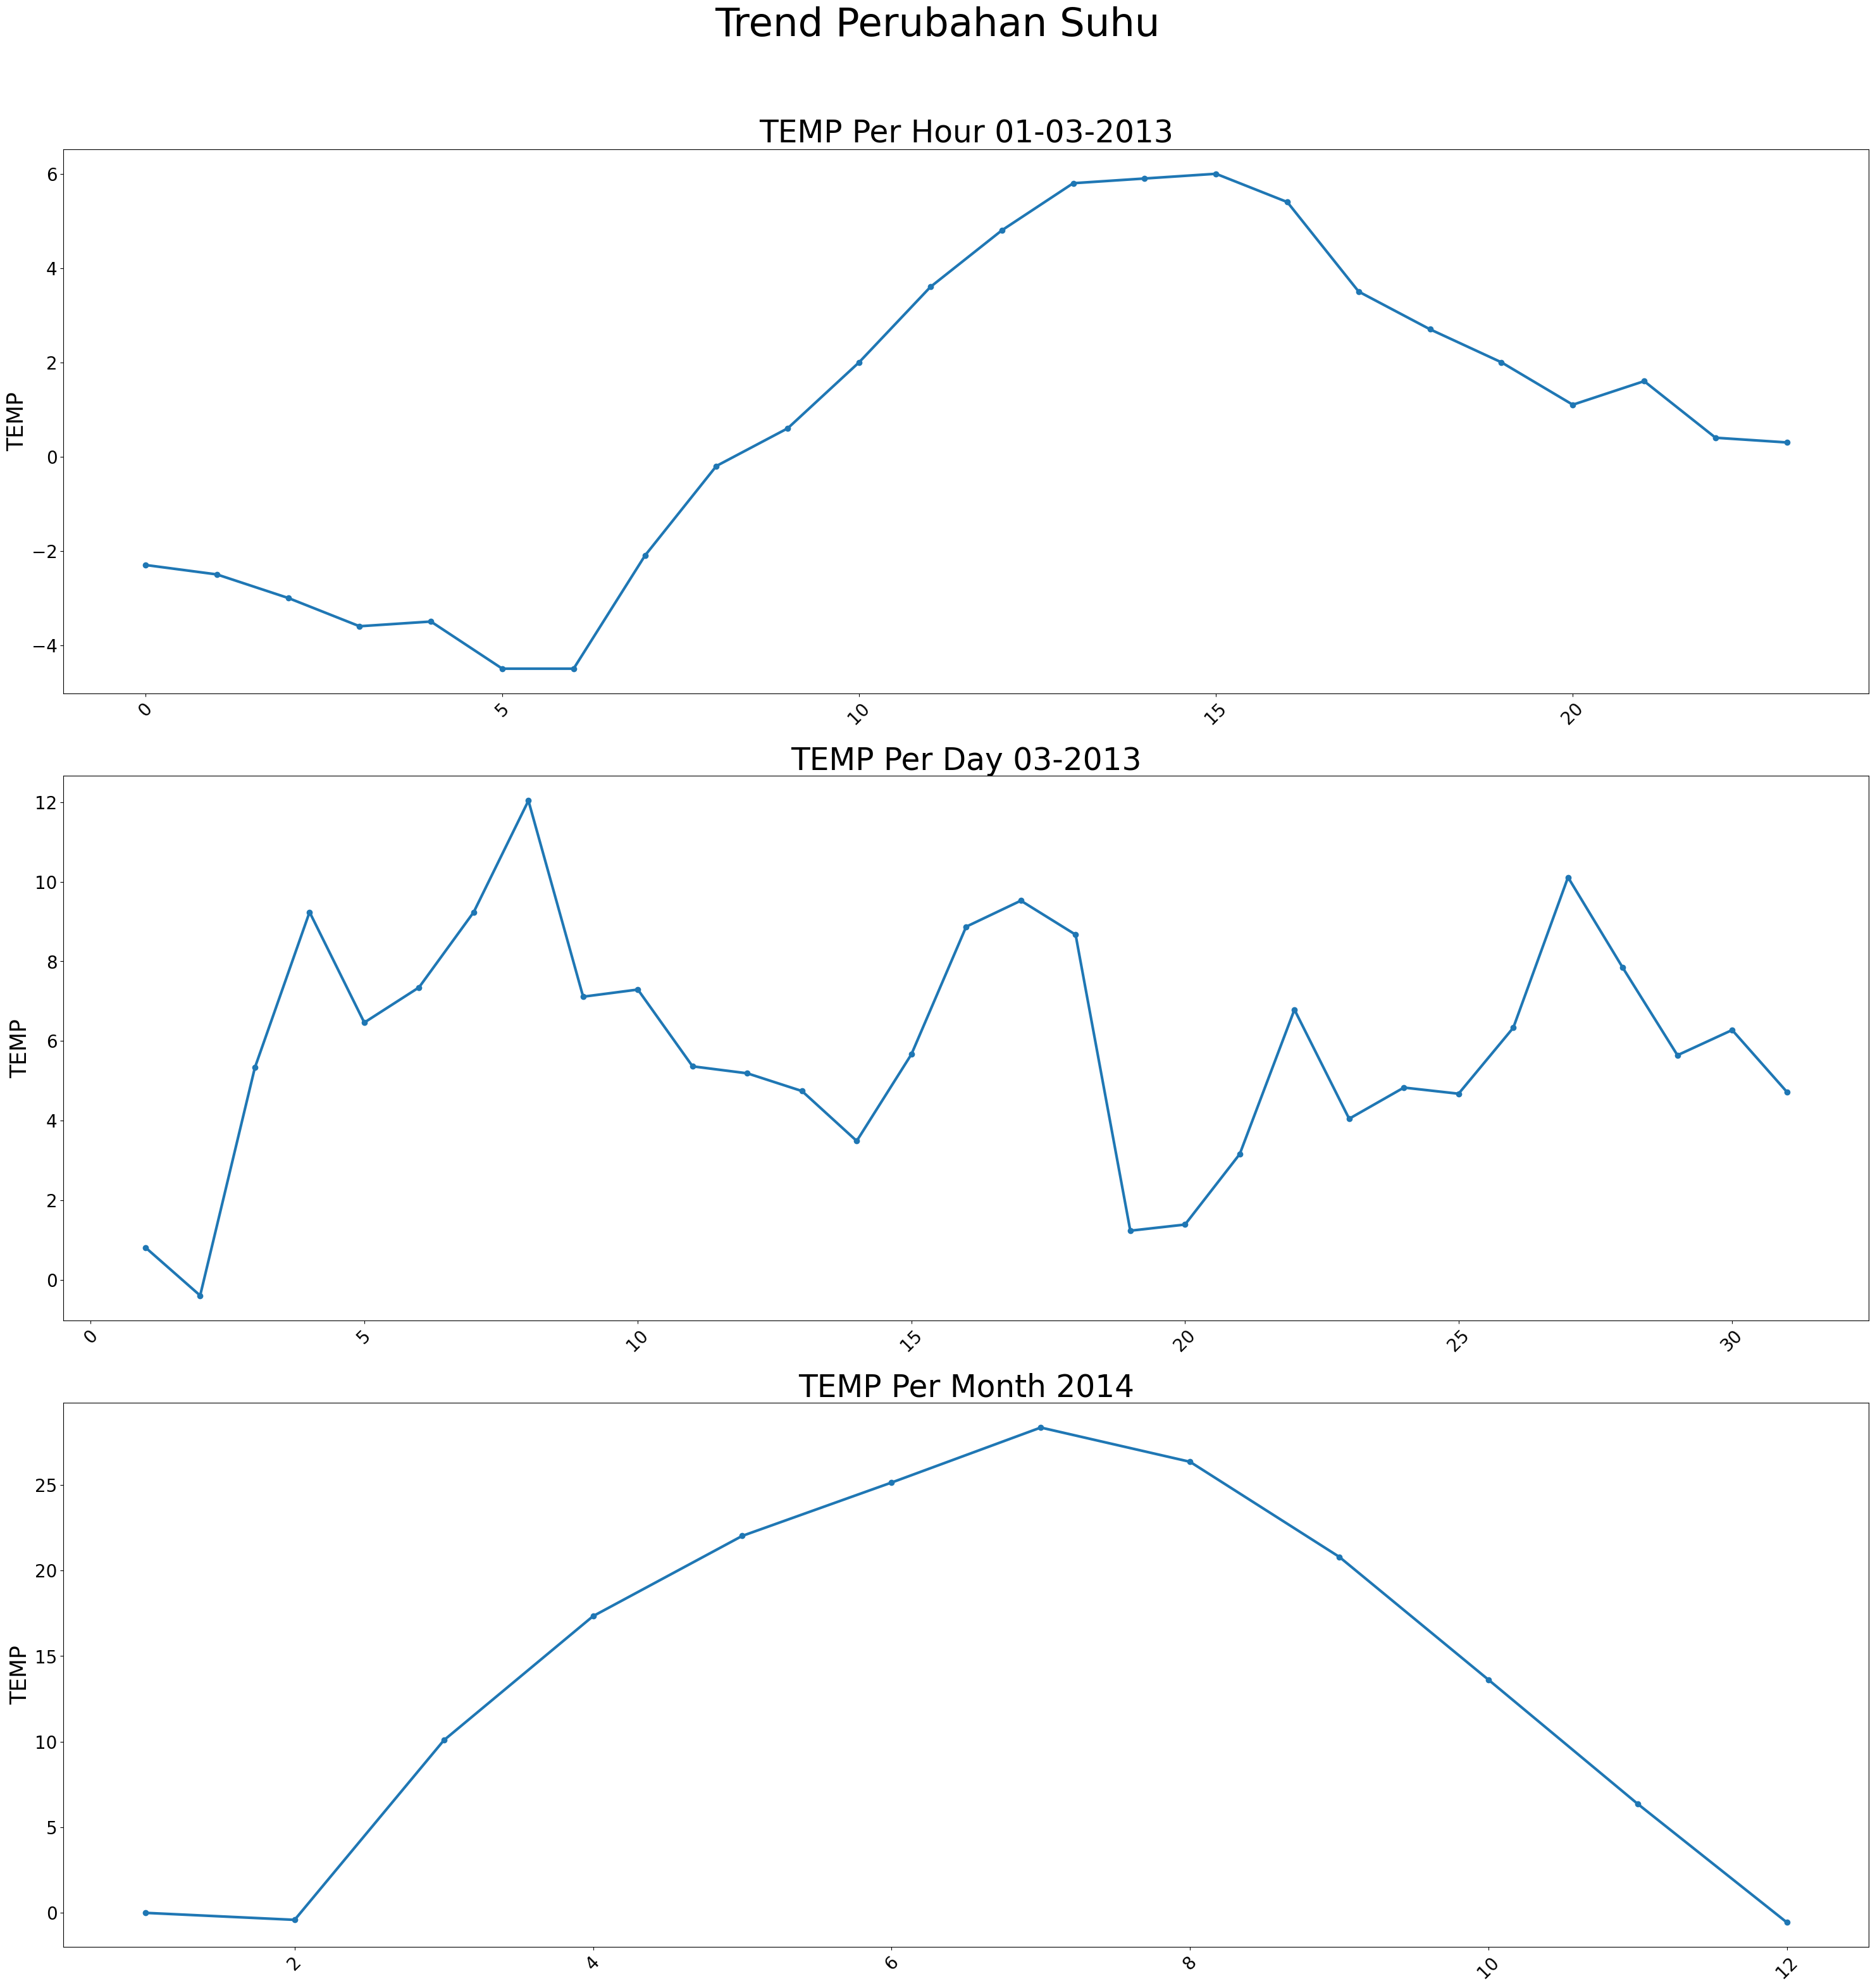

In [35]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 30))


ax[0].plot(changping_temp_hour['hour'].head(24), changping_temp_hour['TEMP'].head(24), marker='o', linewidth=3)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[0].set_ylabel("TEMP", fontsize=25)
ax[0].set_title("TEMP Per Hour 01-03-2013", loc="center", fontsize=35)

ax[1].plot(changping_temp_day["day"].head(31), changping_temp_day['TEMP'].head(31), marker='o', linewidth=3)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[1].set_ylabel("TEMP", fontsize=25)
ax[1].set_title("TEMP Per Day 03-2013", loc="center", fontsize=35)

x = changping_temp_month.iloc[10:22, :]
ax[2].plot(x["month"], x['TEMP'], marker='o', linewidth=3)
ax[2].tick_params(axis='y', labelsize=20)
ax[2].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[2].set_ylabel("TEMP", fontsize=25)
ax[2].set_title("TEMP Per Month 2014", loc="center", fontsize=35)

fig.tight_layout(pad=2.0)

plt.suptitle("Trend Perubahan Suhu", fontsize=45, y=1.05)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh tingkat polusi udara dengan perubahan suhu di Changping?

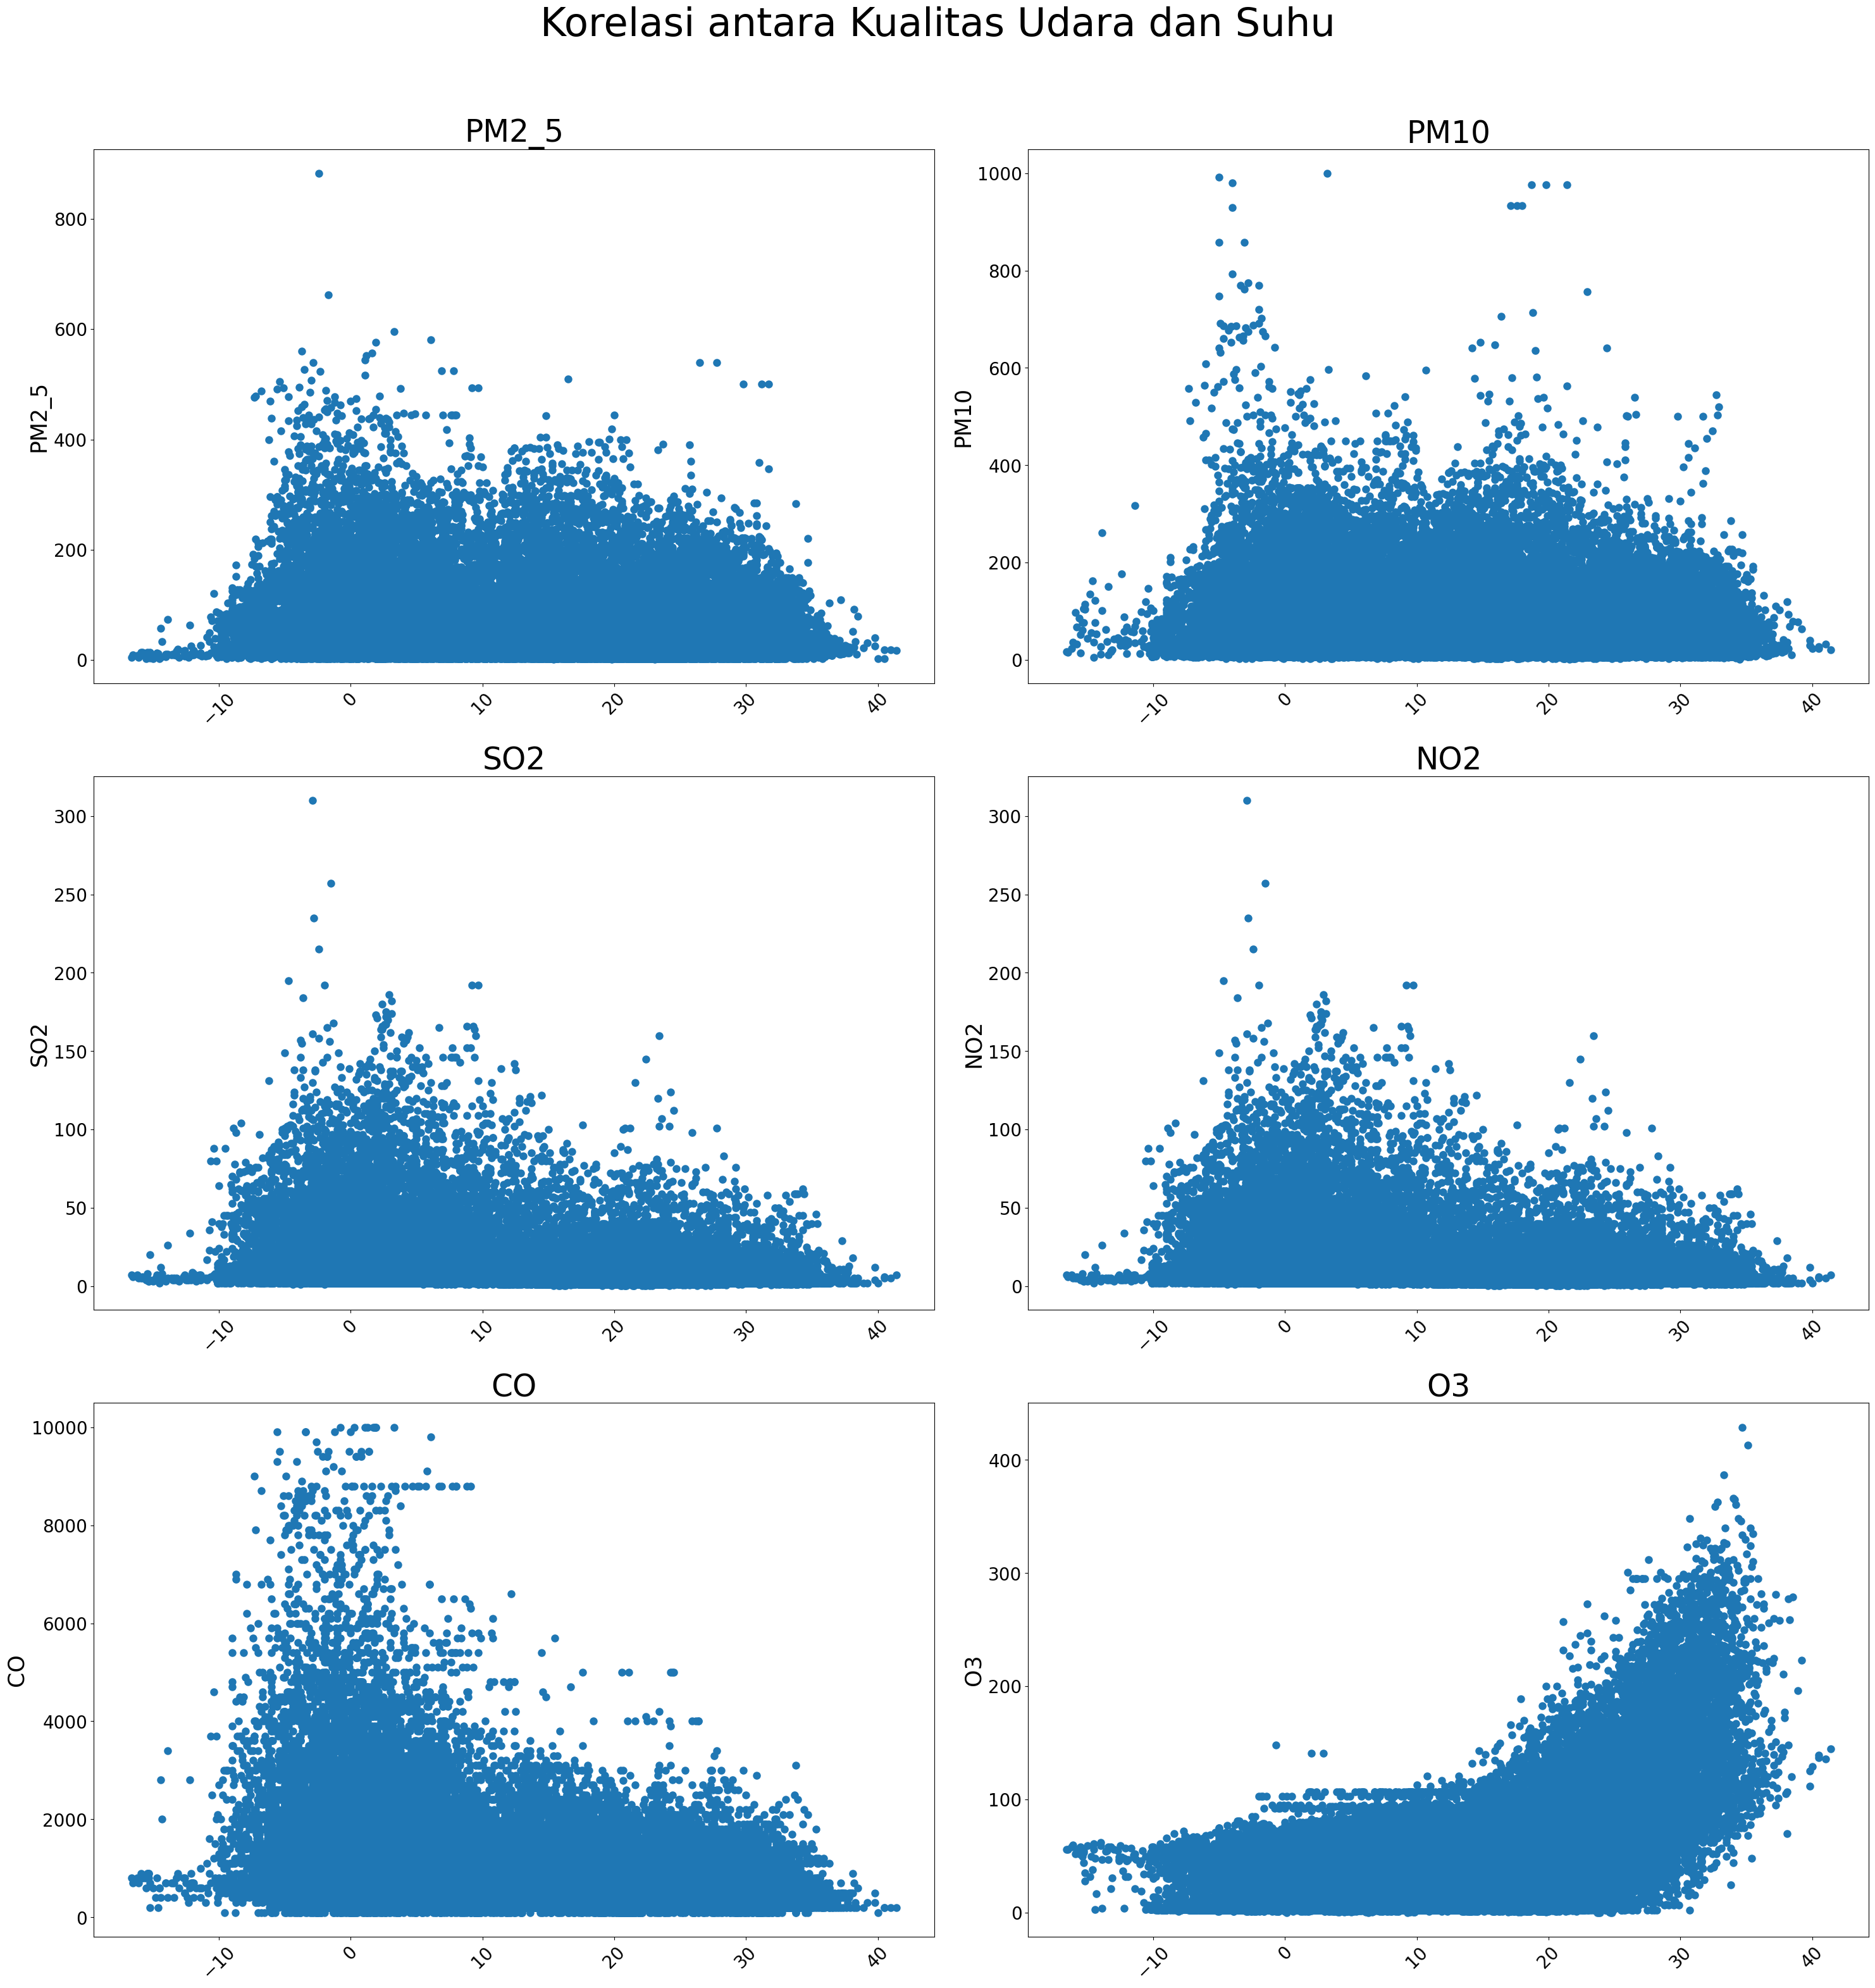

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

Changping_PM2_5 = df_changping["PM2_5"]
Changping_PM10 = df_changping["PM10"]
Changping_SO2 = df_changping["SO2"]
Changping_NO2 = df_changping["NO2"]
Changping_CO = df_changping["CO"]
Changping_O3 = df_changping["O3"]
Changping_Temp = df_changping["TEMP"]

ax[0,0].scatter(Changping_Temp, Changping_PM2_5, marker='o', linewidth=3)
ax[0,0].tick_params(axis='y', labelsize=20)
ax[0,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[0,0].set_ylabel("PM2_5", fontsize=25)
ax[0,0].set_title("PM2_5", loc="center", fontsize=35)
ax[0,1].scatter(Changping_Temp, Changping_PM10, marker='o', linewidth=3)
ax[0,1].tick_params(axis='y', labelsize=20)
ax[0,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[0,1].set_ylabel("PM10", fontsize=25)
ax[0,1].set_title("PM10", loc="center", fontsize=35)
ax[1,0].scatter(Changping_Temp, Changping_SO2, marker='o', linewidth=3)
ax[1,0].tick_params(axis='y', labelsize=20)
ax[1,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[1,0].set_ylabel("SO2", fontsize=25)
ax[1,0].set_title("SO2", loc="center", fontsize=35)
ax[1,1].scatter(Changping_Temp, Changping_SO2, marker='o', linewidth=3)
ax[1,1].tick_params(axis='y', labelsize=20)
ax[1,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[1,1].set_ylabel("NO2", fontsize=25)
ax[1,1].set_title("NO2", loc="center", fontsize=35)
ax[2,0].scatter(Changping_Temp, Changping_CO, marker='o', linewidth=3)
ax[2,0].tick_params(axis='y', labelsize=20)
ax[2,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[2,0].set_ylabel("CO", fontsize=25)
ax[2,0].set_title("CO", loc="center", fontsize=35)
ax[2,1].scatter(Changping_Temp, Changping_O3, marker='o', linewidth=3)
ax[2,1].tick_params(axis='y', labelsize=20)
ax[2,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
ax[2,1].set_ylabel("O3", fontsize=25)
ax[2,1].set_title("O3", loc="center", fontsize=35)

fig.tight_layout(pad=2.0)

plt.suptitle("Korelasi antara Kualitas Udara dan Suhu", fontsize=45, y=1.05)
plt.show()

## Conclusion

- Berdasarkan U.S. Environmental Protection Agency (EPA) untuk parameter kualitas udara dan suhu semakin tinggi niainya semakin buruk untuk kesehatan manusia
- Trend harian kualitas udara Changping tanggal 01-03-2013 PM2.5 dan PM10 rendah saat jam 00-05.
- Trend harian kualitas udara Changping tanggal 01-03-2013 SO2, NO2, dan CO rendah saat jam 09-16, sedangkan untuk O3 fluktuatif grafiknya.
- Trend Bulanan kualitas udara Changping bulan 03-2013 semua parameter fluktuatif dan belum membentuk pola.
- Trend Tahunan kualitas udara Changping tahun 2014 dari PM2.5 sampai NO2 terendah di bulan Juni, sedangkan untuk O3 di Bulan Juni nilai kedua tertinggi.
- Trend harian perubahan suhu Changping tanggal 01-03-2013 grafiknya cembung dengan nilai tertinggi di jam 16.
- Trend Bulanan perubahan suhu Changping bulan 03-2013 grafiknya fluktuatif jadi belum ketemu polanya.
- Trend tahunan perubahan suhu Changping tahun 2014 grafiknya cembung dengan nilai tertinggi di bulan Juli.
- Nilai korelasi antara kualitas udara dan suhu bernilai negatif atau tidak berkorelasi pada parameter kualitas udara PM2_5 sampai NO2, sedangkan yang O3 bernilai positif atau berkorelasi.